# Apple Store Study

## 0. Questions to answer in this study

    1. What is the genre (sports, travel, games...) with the highest user rating? And wich one is     
    the best app according to the users rating?
    
    2. How are the users profile when they rating an app?
    
    3. What is the probability to have an app, given its genre, a rating more or equal than 4.0?
    
    4. Does the popularity of an app affect the user rating?


## 1. Reading the dataset file

In [5]:
import pandas as pd
df = pd.read_csv("/home/reynaldo/Data/app_store_dataset/AppleStore.csv")
df.head()


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Above we see the first 5 rows of the dataset.
This was downloaded from the kaggle website.

Here follow the dictionary of each column:


    "id" : App ID

    "track_name": App Name

    "size_bytes": Size (in Bytes)

    "currency": Currency Type

    "price": Price amount

    "ratingcounttot": User Rating counts (for all version)

    "ratingcountver": User Rating counts (for current version)

    "user_rating" : Average User Rating value (for all version)

    "userratingver": Average User Rating value (for current version)

    "ver" : Latest version code

    "cont_rating": Content Rating

    "prime_genre": Primary Genre

    "sup_devices.num": Number of supporting devices

    "ipadSc_urls.num": Number of screenshots showed for display

    "lang.num": Number of supported languages

    "vpp_lic": Vpp Device Based Licensing Enabled

## 2. Preparing the dataset

For this study I will remove all values in the column "user_rating_ver". I mean, I will create another dataset (named df_rating_not_0) with rating values different(!=) than zero.

In [6]:
df_rating_not_0 = df.loc[(df['user_rating_ver'] != 0)]

### Partially anwering the question #1

Now, I will group the (new) dataset by genre and calculate the mean of the rating.

In [7]:
genre_mean = df_rating_not_0.groupby(['prime_genre']).mean()['user_rating_ver'] 

genre_mean = round(genre_mean.sort_values(ascending=False),2) 

df_genre_mean = pd.DataFrame(genre_mean)
df_genre_mean


#The .sort_values(ascending=False) command is to sort the result in descending order, based in the mean value

#The round(xxxx,2) command is to round the result in 2 decimal places

,user_rating_ver
prime_genre,
Book,4.30
Health & Fitness,4.24
Business,4.22
Catalogs,4.20
Games,4.19
Productivity,4.15
Music,4.14
Photo & Video,4.14
Travel,4.08


### We see that Book is the genre with the best rating (4.30) while Sports is the worst genre with rating mean equals to 3.50 

## 2.1 Going deeper

The result above ranks apps by genre based on the average of users rating. Well, statistically speaking, that rank is not so accurate. The reason is that I only sorted the mean, just considering the absolute value of this mean. If, in fact, we want to compare the mean, we have to consider a statistical approach to get better results. 

Firstly, I'll "organize" the information normalizing the data.

Let's take a look on how the ratings are distributed in the genre Lifestyle, for example. 

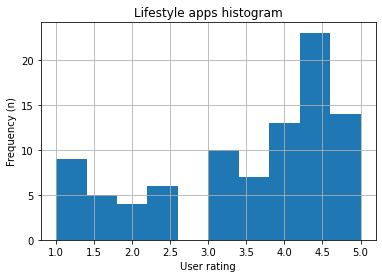

In [24]:
from matplotlib import pyplot as plt

df_lifestyle = df_rating_not_0.loc[(df_rating_not_0['prime_genre'] == 'Lifestyle')]
df_lifestyle['user_rating_ver'].hist()
plt.title('Lifestyle apps histogram')
plt.xlabel('User rating')
plt.ylabel('Frequency (n)')
plt.show()

That histogram shows how the users rating are distributed. 

Now, I'm going to do an interesting procedure:
1. Choose randonly 50 users ratings from Lifestyle apps;
2. I'll calculate the mean of this sample
3. I'll repeat this process (steps 1 and 2) 1000 times !
4. Then, I'll plot the histogram. Each calculation on step 2 will be a "point" in this histogram.

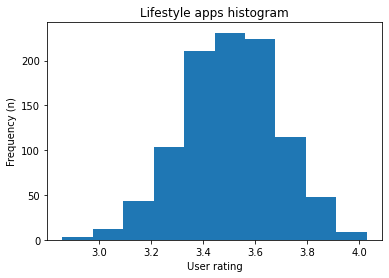

In [25]:
values = []
for i in range(1000):
    selected_sample = df_rating_not_0.loc[(df_rating_not_0['prime_genre'] == 'Lifestyle')]['user_rating_ver'].sample(n=50, replace=True)
    mean_sample = selected_sample.mean()
    values += [mean_sample]

plt.hist(values)
plt.title('Lifestyle apps histogram')
plt.xlabel('User rating')
plt.ylabel('Frequency (n)')
plt.show() 


This histogram looks different from the previous one. I have now a normal distribution. This is a distribution that, 
among other characteristics, have a bell shape. 

I haven't created new data, I just collected much more information 
than I had, and thanks to the "central limit theorem" now I have a bell shaped distribution.
This shape format is very important to perform some statistical calculations.

Now, I'm going to perform that same calculation for all other genres

In [10]:
import numpy as np
genres = df.prime_genre.unique()
genre_mean = []

for names in genres:
    values = []
    for i in range(1000):
        selected_sample = df_rating_not_0.loc[(df_rating_not_0['prime_genre'] == names)]['user_rating_ver'].sample(n=50, replace=True)
        mean_sample = selected_sample.mean()
        values += [mean_sample]
        
    total_mean = sum(values)/len(values) 
    SD = np.std(values)
    genre_mean += [[names,total_mean,SD]]
    
    

I didn't print the information because it looks like the mean table shown in the previous session. The only difference is that now the mean is more accurate (I calculated the mean 1000 times!).On top of that, I added the standard deviation of the mean.

Now, I'm going to sort the information in descending order:

In [11]:
def getKey(item):
    return item[1]
genre_mean = sorted(genre_mean, key=getKey, reverse=True)

Below, We have the most important calculation of this session (or of this study).

I'll perform a hypothesis test to check if the difference between two consecutive positions is significant or not. I mean, if the difference is not significant, I would say that there is no difference between the genres, thus I'll consider that genres on the same position of the rank. Otherwise, the genres and its mean will be in different position of the rank.  

Here follow a beautifull video from Kahn Academy explaining how to perform a hypotesis test that is close to the calculation that I'll show bellow: [Link here](https://www.khanacademy.org/math/statistics-probability/significance-tests-confidence-intervals-two-samples/comparing-two-means/v/hypothesis-test-for-difference-of-means)



In [12]:
rank_num = 1
rank = [['Book',1]]
for i in range(1,len(genre_mean)):
    SE = ((((genre_mean[i-1][2])**2)/1000)+(((genre_mean[i][2])**2)/1000))**0.5
    D = SE*1.96    #I'm working with the interval of 95% of confidence
    M = genre_mean[i-1][1]-genre_mean[i][1]
    if M > D:
        rank += [[genre_mean[i][0],rank_num]]
    else:
        rank_num = rank_num + 1
        rank += [[genre_mean[i][0],rank_num]]

Now, just organizing the information transforming the data into a dataframe.

In [13]:
df_rank = pd.DataFrame(rank, columns =['Genre', 'Rank'])
df_rank

,Genre,Rank
0,Book,1
1,Health & Fitness,1
2,Business,1
3,Catalogs,1
4,Games,2
5,Productivity,2
6,Music,2
7,Photo & Video,3
8,Travel,3
9,Shopping,3


#### The conclusion is that we cannot compare the apps just based on its mean. Let's take a look at the position #8 of the rank above. We cannot say wich app had the highest user rating: Food & Drink, Social Networking, Finance, Entertainment or Utilities. They are on the same position of the rank  (based on statistical arguments). For the same reason, We cannot decide wich app has the best rating: Book or Health & Fitness. The only thing we can say is that both are on the position #1 on the rank.

## 3. User Profile

I'm going to analyze a histogram.   
Let's choose lifestyle apps as an example

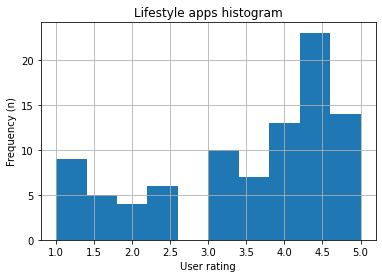

In [26]:
df_lifestyle = df_rating_not_0.loc[(df_rating_not_0['prime_genre'] == 'Lifestyle')]
df_lifestyle['user_rating_ver'].hist()
plt.title('Lifestyle apps histogram')
plt.xlabel('User rating')
plt.ylabel('Frequency (n)')
plt.show()

Let's take a look in other genre: games

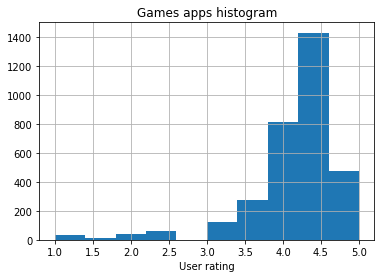

In [15]:
df_games = df_rating_not_0.loc[(df_rating_not_0['prime_genre'] == 'Games')]
df_games['user_rating_ver'].hist()
plt.title('Games apps histogram')
plt.xlabel('User rating')
plt.show()

If you would plot the histogram for all other genres you would see the same trend as you saw in the plots above: a negative skew, meaning that the peak of the distibution is concentrated on the right of the cartesian plane, not in the center like a normal distribution. To find out a little bit more about skewness click [here](https://en.wikipedia.org/wiki/Skewness).

These plots (and trend) made me draw the answer for the question #2 (at the beginning of this study): 

#### When someone goes to rate an app, in general people give a good rate. People who don't like a app don't rate it a lot.

## 4. Probability of a good rating

The chunk of code bellow calculates the probability for a specific genre to have a rating more or equal to 4.0

In [16]:
genres = df.prime_genre.unique()
probability_genres = []
for names in genres:
    df_selected = df_rating_not_0.loc[(df_rating_not_0['prime_genre'] == names)]['user_rating_ver']
    probability_genres += [round((sum(df_selected[df_selected>=4].value_counts())/len(df_selected))*100,1)]
frame = {'Genre': genres,'Probability %': probability_genres}
df_probability = pd.DataFrame(frame)
df_probability = df_probability.sort_values(['Probability %'],ascending=[True])
df_probability

,Genre,Probability %
10,Sports,53.0
17,Lifestyle,54.9
7,Utilities,55.6
19,News,56.5
13,Entertainment,57.6
9,Social Networking,57.7
22,Catalogs,60.0
5,Finance,60.9
15,Navigation,65.4
16,Education,66.4


### Book, Games, Business and Health & Fitness apps have more than 80% probability to have a user rating equal or more than 4.0 

## 5. The popularity of an app

We can assess the popularity of an app by the number of downloads. Unfortunately, the dataset from Apple Store doesn't have the number of downloads, but I'll use the information from another dataset to infer the popularity of an app in the Apple store. I'm going to use now a dataset from Play Store (apps for Androids devices). This new dataset has the number of downloads of each app.

   ## 5.1 Google Dataset

In [17]:
df_google = pd.read_csv("/home/reynaldo/Data/play_store_dataset/googleplaystore.csv")

## 5.1.1 Cleaning the data

In [18]:
#Droping NaN values
df_google = df_google.dropna()

#Converting reviews to numeric
df_google['Reviews'] = pd.to_numeric(df_google['Reviews'], errors='coerce')

#From 'Installs' column, I'm going to remove the '+' and convert it to numeric
df_google['Installs'] = df_google['Installs'].str.replace('+','')
df_google['Installs'] = df_google['Installs'].str.replace(',','')
df_google['Installs'] = pd.to_numeric(df_google['Installs'], errors='coerce')

#Selecting just the information that it is now needed for me
df_google_select = df_google[['Category','Rating','Reviews','Installs']]

#Creating a new column 'Review_rate'. It is the relationship(ratio) between the number of
# user reviewn and the number if downloads
df_google_select['Review_rate'] = df_google_select['Reviews']/df_google_select['Installs']


#Finally, organizing the information by number of downloads.
installs_bins = df_google_select.groupby(['Installs']).mean()
installs_bins['Review_rate'] = round(installs_bins['Review_rate']*100,2)

#and printing just the information for more than 5000 downloads
df_more_5000 = installs_bins.iloc[7: ,2: ]
df_more_5000

/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Review_rate
Installs,
5000,2.17
10000,3.55
50000,2.02
100000,3.43
500000,1.96
1000000,3.31
5000000,2.06
10000000,3.63
50000000,2.46


The information above shows the average of the review rate grouped by installs. This rate shows that, for apps with 100000+ installs, for example, the review rate is 3.43%. It means that 1 user review is equal to 29.15 downloads(or installs). (100/3.43 = 29.15) 
Let's take a look at the plot of the table above.

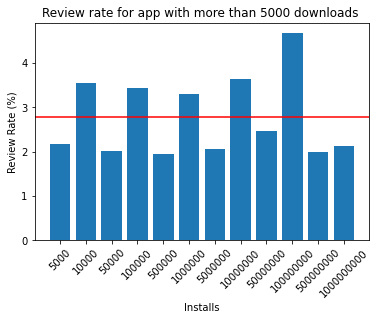

In [23]:
import numpy as np
bars = (5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000)
y_pos = np.arange(len(df_more_5000))
plt.bar(y_pos,df_more_5000['Review_rate'])
plt.xticks(y_pos, bars, rotation=45)
plt.axhline(df_more_5000['Review_rate'].mean(), color='r', linestyle='-')
plt.title('Review rate for app with more than 5000 downloads ')
plt.xlabel('Installs')
plt.ylabel('Review Rate (%)')
plt.show()

The red line (y=2.8%) shows the Review rate average. In average, the relationship between the number of installs an app has and its number of reviews is 2.8%.Conversely, 1 user review is equal to appox. 36 downloads.

#### We can conclude that the more user reviews an app has more downloads it has. Therefore, an app with 100 reviews is less popular than an app with 5000 reviews, for example.

Let's go back to the Apple store apps. Firstly, I'll multiply the number of reviews by 35.7, this number came from the calculation I performed using the Google apps dataset. I found that on average 1 user review is equal to 35.7 downloads (2.8% -> 100/2.8 or 1/0.028 = 35.7).

In [28]:
df_apple = df
df_apple['Rating_Total'] = df_apple['rating_count_tot'] + df_apple['rating_count_ver']
df_apple['Downloads_Estimate'] = 35.7 * df_apple['Rating_Total']

bins = [5000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000]
labels = ['5000+','50000+','100000+','500000+','1000000+','5000000+','10000000+','50000000+','100000000+','500000000+']
df_apple['bins'] = pd.cut(df_apple['Downloads_Estimate'], bins=bins, labels=labels)
installs = df_apple.groupby(['bins']).mean()['user_rating_ver']

df_apple_installs = pd.DataFrame(installs)
df_apple_installs

,user_rating_ver
bins,
5000+,3.806590
50000+,4.114437
100000+,4.194362
500000+,4.180685
1000000+,4.182266
5000000+,4.258824
10000000+,4.290323
50000000+,4.166667
100000000+,3.500000


The table above shows the average of the users rating for each group of downloads.

Beside, the last two bins the average doesn't differ too much from each group. We can exclude the results from the group with 100000000+ installs (mean 3.5) and the group with 500000000+ installs (mean NaN). See the information below.

In [21]:
df_apple['bins'].value_counts()

5000+         1988
100000+       1011
50000+         568
1000000+       406
500000+        321
5000000+        85
10000000+       62
50000000+        3
100000000+       1
500000000+       0
Name: bins, dtype: int64

This shows how many app we have in each group. We don't have significant values for the last three groups.
Anyway,

#### the average rating grouped by the number of download  shows that despite the popularity the average rating doesn't change. I mean, a popular app with 1000000+ downloads (mean rating equals to 4.18), for example doesn't have a rating much bigger than an app with 50000+ downloads (mean rating equals to 4.11). 